<a href="https://colab.research.google.com/github/Kofi-Young/gitskills/blob/master/new1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install quandl
!pip install pyfolio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import quandl
import pyfolio as pf

#Split
from sklearn.model_selection import train_test_split,TimeSeriesSplit,GridSearchCV
#Feature selection / dimension reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV,SelectPercentile,f_regression
#Performance evaluation
from sklearn import metrics

# Classifiers
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression,PassiveAggressiveClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

import warnings
warnings.filterwarnings('ignore')

quandl.ApiConfig.api_key = "WLMxat9y7vVtegz9ZEe5"
start = '2000-01-01'
end = '2020-04-30'

np.random.seed(seed=1)

     |████████████████████████████████| 92kB 2.2MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-cp36-none-any.whl size=88668 sha256=51e1da854a74aee0b48e65187cfd2a908b93b58da5e445ecb42d5f6f4091f966
  Stored in directory: /root/.cache/pip/wheels/0d/a8/7d/ac33fe6bf6f3db370291c9de303460d00b8f97cc40a1d80f72
  Created wheel for empyrical: filename=empyrical-0.5.3-cp36-none-any.whl size=37087 sha256=07552e588d90703e692f0e9687451c2e2b9a5975bdb37a7255959748e8aabd72
  Stored in directory: /root/.cache/pip/wheels/10/a4/3b/951bd609878a82fd72b9ea23699daf1eaada4ff6f583152876
Successfully built pyfolio empyrical


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


In [0]:
#Daily data from Quandl
quandl_dict= {
    #futures
    'gold' :"CHRIS/CME_GC1.4", #Gold Futures, Continuous Contract #1 (GC1) (Front Month)
    'eurodollar': "CHRIS/CME_ED1.4", #Eurodollar Futures, Continuous Contract #1 (ED1) (Front Month)
    'silver': "CHRIS/CME_SI1.4", #Silver Futures, Continuous Contract #1 (SI1) (Front Month)
    'DCOILWTICO': "FRED/DCOILWTICO.4", #Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma
    #major currency pair spot rates
    'USDCAD': "FED/RXI_N_B_CA", #CANADA -- SPOT EXCHANGE RATE, CANADIAN $/US$, Business day
    'EURUSD': "FED/RXI_US_N_B_EU", #SPOT EXCHANGE RATE - EURO AREA, Business day
    'GBPUSD': "FED/RXI_US_N_B_UK", #UNITED KINGDOM -- SPOT EXCHANGE RATE, US$/POUND (1/RXI_N.B.UK), Business day
    'USDJPY': "FED/RXI_N_B_JA", #JAPAN -- SPOT EXCHANGE RATE, YEN/US$, Business day
    'AUDUSD': "FED/RXI_US_N_B_AL", #AUSTRALIA -- SPOT EXCHANGE RATE US$/AU$ (RECIPROCAL OF RXI_N.B.AL), Business day
    'NZDUSD': "FED/RXI_US_N_B_NZ", #NEW ZEALAND -- SPOT EXCHANGE RATE, US$/NZ$ RECIPROCAL OF RXI_N.B.NZ, Business day
    'USDCHF': "FED/RXI_N_B_SZ", #SWITZERLAND -- SPOT EXCHANGE RATE, FRANCS/US$, Business day
    'USDNOK': "FED/RXI_N_B_NO", #NORWAY -- SPOT EXCHANGE RATE, KRONER/US$, Business day
    'USDCNY': "FED/RXI_N_B_CH", #CHINA -- SPOT EXCHANGE RATE, YUAN/US$ P.R., Business day
    'USDINR': "FED/RXI_N_B_IN", #INDIA -- SPOT EXCHANGE RATE, RUPEES/US$, Business day
    'DTWEXM': "FRED/DTWEXM", #Trade Weighted U.S. Dollar Index: Major Currencies
    'DTWEXB': "FRED/DTWEXB", #Trade Weighted U.S. Dollar Index: Broad
    #Interest rates
    'DFF': "FRED/DFF", #Effective Federal Funds Rate
    'DTB3': "FRED/DTB3", #3-Month Treasury Bill: Secondary Market Rate
    'DGS5': "FRED/DGS5", #5-Year Treasury Constant Maturity Rate
    'DGS10': "FRED/DGS10",#10-Year Treasury Constant Maturity Rate
    'DGS30': "FRED/DGS30", #30-Year Treasury Constant Maturity Rate
    'T5YIE': "FRED/T5YIE", #5-year Breakeven Inflation Rate
    'T10YIE': "FRED/T10YIE", #10-year Breakeven Inflation Rate
    'T5YIFR': "FRED/T5YIFR",#5-Year, 5-Year Forward Inflation Expectation Rate 
    'TEDRATE': "FRED/TEDRATE", #TED Spread
    'DPRIME': "FRED/DPRIME" #Bank Prime Loan Rate
}

In [0]:
#Local files (Source: yahoo finance)
local_files = {
    'VIX':"https://raw.githubusercontent.com/YizhouTang/SP500_Classfication_Models/master/data/VIX.csv", #Vix index
    #Sector ETFs:
    'XLE':"https://raw.githubusercontent.com/YizhouTang/SP500_Classfication_Models/master/data/XLE.csv", #Energy Select Sector SPDR Fund 
    'XLF':"https://raw.githubusercontent.com/YizhouTang/SP500_Classfication_Models/master/data/XLF.csv", #Financial Select Sector SPDR Fund
    'XLU':"https://raw.githubusercontent.com/YizhouTang/SP500_Classfication_Models/master/data/XLU.csv", #Utilities Select Sector SPDR Fund
    'XLI':"https://raw.githubusercontent.com/YizhouTang/SP500_Classfication_Models/master/data/XLI.csv", #Industrial Select Sector SPDR Fund
    'XLK':"https://raw.githubusercontent.com/YizhouTang/SP500_Classfication_Models/master/data/XLK.csv", #Technology Select Sector SPDR Fund
    'XLV':"https://raw.githubusercontent.com/YizhouTang/SP500_Classfication_Models/master/data/XLV.csv", #Health Care Select Sector SPDR Fund
    'XLY':"https://raw.githubusercontent.com/YizhouTang/SP500_Classfication_Models/master/data/XLY.csv", #Consumer Discretionary Select Sector SPDR Fund
    'XLP':"https://raw.githubusercontent.com/YizhouTang/SP500_Classfication_Models/master/data/XLP.csv", #Consumer Staples Select Sector SPDR Fund
    'XLB':"https://raw.githubusercontent.com/YizhouTang/SP500_Classfication_Models/master/data/XLB.csv", #Materials Select Sector SPDR Fund
}

In [0]:
# Import SPY
url = "https://raw.githubusercontent.com/YizhouTang/SP500_Classfication_Models/master/data/SPY.csv"

#df = pd.read_csv('SPY.csv',index_col = 'Date',parse_dates = True)
df = pd.read_csv(url,index_col = 'Date',parse_dates = True)

In [0]:
#Function to get data from Quandl.
def get_quandl_data(df,quandl_dict,start,end):
    data = quandl.get(list(quandl_dict.values()), start_date=start, end_date=end)
    data.columns = list(quandl_dict.keys())
    df = pd.concat([df, data.reindex(df.index)], axis=1)
    return df

#Function to get data from Quandl.
def get_local_data(df,local_files,start,end):
    for i in local_files:
        url = local_files[i]
        df_temp = pd.read_csv(url,index_col='Date',parse_dates = True)
        df_temp = df_temp['Adj Close'].to_frame()
        df_temp.columns = [i]
        df = pd.concat([df, df_temp.reindex(df.index)], axis=1)

    mask = (df.index>=pd.to_datetime(start)) & (df.index <=pd.to_datetime(end))
    df = df.loc[mask]
    return df

#Function to get sparse econ data (frequence != daily) from Quandl.
#Also compute the change in economic data.
#All econ data are preproccessed using ffill.
def get_sparse_econ_data(df,econ_dict,start,end):
    #Get raw econ data
    data = quandl.get(list(econ_dict.values()), start_date=start, end_date=end)
    data.columns = list(econ_dict.keys())
    #Get econ data, transformed using percentage return
    ret_data = quandl.get(list(econ_dict.values()), start_date=start, end_date=end,transform = "rdiff")
    ret_data.columns = [col + '_ret' for col in list(econ_dict.keys())]

    data = data.ffill()
    data = data.reindex(df.index)
    data = data.ffill()

    ret_data = ret_data.ffill()
    ret_data = ret_data.reindex(df.index)
    ret_data = ret_data.ffill()

    df = pd.concat([df,data ,ret_data], axis=1)

    return df

In [0]:
#Function to compute additional derived features
#It iterates through each existing feature and compute key statistics (rolling) for multiple lookback periods.
def derive_features(df):
    features = df.columns
    #Iterate through each column in df
    for col in features:
        if col != 'y':
            #Daily change
            df[col+'_ret'] = df[col].pct_change()
            df[col+'_diff'] = df[col].diff()
            #Lookback periods
            lookback = [5,21, 63, 126, 252]#1 week, 1 month, 1 quarter, half year, 1 year
            
            #Compute key statistics for each lookback period
            for i in lookback:
                df[col+'_ret_' + str(i)] = df[col]/df[col].shift(i)-1
                #Return-based
                df[col+'_rolling_mean_' + str(i)] = df[col+'_ret'].rolling(i).mean()
                df[col+'_rolling_median_' + str(i)] = df[col+'_ret'].rolling(i).median()
                df[col+'_rolling_stdev_' + str(i)] = df[col+'_ret'].rolling(i).std()
                df[col+ '_rolling_skew_' + str(i)] = df[col+'_ret'].rolling(i).skew()
                df[col+ '_rolling_kurt_' + str(i)] = df[col+'_ret'].rolling(i).kurt()
                df[col+ '_rolling_min_' + str(i)] = df[col+'_ret'].rolling(i).min()
                df[col+ '_rolling_max_' + str(i)] = df[col+'_ret'].rolling(i).max()
                df[col+ '_rolling_corr_' + str(i)] = df[col+'_ret'].rolling(i).corr()
                df[col+ '_ewma_' + str(i)] = pd.DataFrame.ewm(df[col], span= i).mean()
                #Relative level
                df[col+'_rel_lvl_mean_' + str(i)] = df[col]/df[col].rolling(i).mean()
                df[col+'_rel_lvl_min_' + str(i)] = df[col]/df[col].rolling(i).min()
                df[col+'_rel_lvl_max_' + str(i)] = df[col]/df[col].rolling(i).max()                        
    return df

In [0]:
df = get_quandl_data(df,quandl_dict,start,end)
df = get_local_data(df,local_files,start,end)

# Compute additional derived features.
df = derive_features(df)  

In [9]:
df = df.tz_localize(tz='US/Eastern')

#rmissingvaluecol is a helper function that removes columns that have nans more than the threshold percentage
def rmissingvaluecol(df,threshold):
    l = []
    l = list(df.drop(df.loc[:,list((100*(df.isnull().sum()/len(df.index))>=threshold))].columns, 1).columns.values)
    print("# Columns having more than %s percent missing values:"%threshold,(df.shape[1] - len(l)))
    return l

df = df.replace([np.inf, -np.inf], np.nan)

cols = rmissingvaluecol(df,1) #Here threshold is 1% which means we are going to drop columns having more than 1% of missing values

df_dropped_na= df[cols]

df_dropped_na = df_dropped_na.dropna()

# Columns having more than 1 percent missing values: 1888


In [10]:
df_dropped_na.shape

(4997, 968)

In [0]:
num_train = int(0.9*len(df_dropped_na))

In [0]:
y_pre = df_dropped_na['Adj Close']
X_pre = df_dropped_na
X_pre = X_pre.drop(['Adj Close'], axis = 1)

In [42]:
X_pre

,Open,High,Low,Close,Volume,eurodollar,USDCAD,EURUSD,GBPUSD,USDJPY,AUDUSD,NZDUSD,USDCHF,USDNOK,USDCNY,USDINR,DFF,DTB3,DGS5,DGS10,DPRIME,VIX,XLE,XLF,XLU,XLI,XLK,XLV,XLY,XLP,XLB,Open_ret,Open_diff,Open_ret_5,Open_rolling_mean_5,Open_rolling_median_5,Open_rolling_stdev_5,Open_rolling_skew_5,Open_rolling_kurt_5,Open_rolling_min_5,...,XLP_rolling_max_21,XLP_rolling_corr_21,XLP_ewma_21,XLP_rel_lvl_mean_21,XLP_rel_lvl_min_21,XLP_rel_lvl_max_21,XLP_ewma_63,XLP_ewma_126,XLP_ewma_252,XLB_ret,XLB_diff,XLB_ret_5,XLB_rolling_mean_5,XLB_rolling_median_5,XLB_rolling_stdev_5,XLB_rolling_skew_5,XLB_rolling_kurt_5,XLB_rolling_min_5,XLB_rolling_max_5,XLB_rolling_corr_5,XLB_ewma_5,XLB_rel_lvl_mean_5,XLB_rel_lvl_min_5,XLB_rel_lvl_max_5,XLB_ret_21,XLB_rolling_mean_21,XLB_rolling_median_21,XLB_rolling_stdev_21,XLB_rolling_skew_21,XLB_rolling_kurt_21,XLB_rolling_min_21,XLB_rolling_max_21,XLB_rolling_corr_21,XLB_ewma_21,XLB_rel_lvl_mean_21,XLB_rel_lvl_min_21,XLB_rel_lvl_max_21,XLB_ewma_63,XLB_ewma_126,XLB_ewma_252
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-02-03 00:00:00-05:00,140.875000,143.250000,140.000000,143.187500,7997500,93.725,1.4417,0.9887,1.6025,107.92,0.6387,0.4967,1.6255,8.1580,8.2781,43.65,5.71,5.46,6.56,6.49,8.75,22.010000,17.223690,9.475562,13.162952,18.544994,41.750828,23.423964,21.845388,14.221502,14.706469,-0.002875,-0.406250,-0.006830,-0.001178,-0.002875,0.021941,0.395236,-1.032279,-0.025997,...,0.063395,1.0,14.466807,0.974983,1.016060,0.932692,14.518572,14.529206,14.533897,-0.017027,-0.254746,-0.017671,-0.003469,-0.005992,0.015029,0.680600,-0.953760,-0.017027,0.018084,1.0,14.841972,0.994962,1.005358,0.982973,-0.088092,-0.004236,-0.005992,0.017507,0.962076,0.935641,-0.026428,0.041312,1.0,15.387051,0.928508,1.005358,0.853811,15.700549,15.785586,15.828226
2000-02-04 00:00:00-05:00,143.187500,144.000000,142.125000,142.593750,4925400,93.720,1.4467,0.9760,1.5915,107.54,0.6315,0.4930,1.6470,8.2700,8.2788,43.65,5.70,5.50,6.64,6.53,8.75,21.540001,16.727045,9.378209,13.095022,18.620127,42.238579,23.505219,21.808962,14.211734,14.686873,0.016415,2.312500,0.026894,0.005498,0.010957,0.020994,-0.783440,0.420617,-0.025997,...,0.063395,1.0,14.440999,0.973878,1.015363,0.932051,14.500590,14.513424,14.519213,-0.001332,-0.019596,-0.001997,-0.000332,-0.001332,0.012993,0.290908,0.523158,-0.017027,0.018084,1.0,14.790269,0.994032,1.004019,0.981663,-0.125438,-0.006267,-0.005992,0.014102,0.460038,-0.147440,-0.026428,0.025671,1.0,15.316206,0.933181,1.004019,0.852673,15.641145,15.730969,15.776204
2000-02-07 00:00:00-05:00,142.562500,142.781250,141.437500,142.375000,5845800,93.720,1.4457,0.9783,1.5917,108.75,0.6339,0.4936,1.6426,8.2590,8.2788,43.64,5.76,5.47,6.76,6.64,8.75,22.790001,16.915773,9.280859,13.057293,18.298155,42.726326,23.122164,21.347523,14.192191,14.402741,-0.004365,-0.625000,0.049701,0.009825,0.010957,0.013917,0.374678,-1.222012,-0.004365,...,0.063395,1.0,14.416080,0.973004,1.013966,0.930769,14.482998,14.497980,14.504848,-0.019346,-0.284132,-0.015405,-0.003003,-0.001332,0.015565,0.298236,-1.374853,-0.019346,0.018084,1.0,14.661088,0.977784,1.000000,0.962672,-0.163823,-0.008411,-0.007009,0.012312,0.243702,-0.736223,-0.026428,0.018084,1.0,15.224720,0.923008,1.000000,0.836653,15.570504,15.667111,15.715875
2000-02-08 00:00:00-05:00,143.968750,144.562500,143.625000,144.312500,4936400,93.730,1.4473,0.9862,1.6105,109.59,0.6353,0.4940,1.6301,8.1835,8.2788,43.63,5.67,5.52,6.74,6.59,8.75,21.250000,16.766775,9.384703,13.087480,18.373295,43.116524,23.377531,21.833246,14.368129,14.363553,0.009864,1.406250,0.030188,0.005999,0.009864,0.009140,-0.274205,-2.566764,-0.004365,...,0.018686,1.0,14.411321,0.987904,1.026536,0.950841,14.476611,14.491933,14.499052,-0.002721,-0.039188,-0.035526,-0.007164,-0.002721,0.010464,-0.309402,-2.554769,-0.019346,0.004606,1.0,14.561907,0.982179,1.000000,0.960053,-0.165623,-0.008513,-0.007009,0.012252,0.266061,-0.679648,-0.026428,0.018084,1.0,15.139262,0.928576,1.000000,0.837236,15.50338

In [0]:
scaler = StandardScaler()
#Fit scaler using the training data
scaler.fit(X_pre[:num_train])
X_scaled = scaler.transform(X_pre)

In [0]:
#Initialize and fit selector
MI_selector = SelectPercentile(f_regression, percentile=10)#Remove the lower 40%
MI_selector.fit(X_pre,  y_pre)

#Transform
X_MI = MI_selector.transform(X_pre)

In [14]:
X_MI.shape

(4997, 97)

In [0]:
pca = PCA(0.99).fit(X_MI)
X_PCA = pca.transform(X_MI)

In [122]:
pca.n_components_

3

In [94]:
#X_PCA[:,0]

array([-140.36985762, -138.85138368, -139.2159068 , ...,  752.42436329,
        743.47824817,  747.20393111])

In [0]:
y_pred = y_pre[:, np.newaxis]
#X_PCA = X_PCA[:,0][:, np.newaxis]
dataset = np.concatenate((X_PCA, y_pred),axis=1) 
#dataset = np.concatenate((X_MI, y_pred),axis=1) 
#dataset = y_pred

In [124]:
dataset

array([[-140.36985762,   87.54646185,  -32.02725076,   97.856789  ],
       [-138.85138368,   88.15093459,  -33.3273697 ,   97.451012  ],
       [-139.2159068 ,   88.43093906,  -33.21273796,   97.301529  ],
       ...,
       [ 752.42436329,   85.01199922,   72.36615503,  281.589996  ],
       [ 743.47824817,   85.23440782,   78.54927426,  273.040009  ],
       [ 747.20393111,   84.79364565,   75.702806  ,  279.100006  ]])

In [0]:
scaler = StandardScaler()
#Fit scaler using the training data
scaler.fit(dataset[:num_train])
data_scaled = scaler.transform(dataset)

In [0]:

data_mean = dataset[:num_train].mean(axis=0)
data_std = dataset[:num_train].std(axis=0)
dataset1 = (dataset-data_mean)/data_std

In [21]:
dataset1

array([[ 0.55824921,  2.15342108, -1.26078906,  0.05881265],
       [ 0.57138224,  2.16854991, -1.31636643,  0.04040856],
       [ 0.56822954,  2.1755579 , -1.31146616,  0.03362873],
       ...,
       [ 8.27988184,  2.08998819,  3.20181055,  8.39206693],
       [ 8.20250834,  2.09555466,  3.46612595,  8.00428066],
       [ 8.23473116,  2.0845232 ,  3.34444539,  8.27913296]])

In [0]:
reverse_dataset = dataset1*data_std+data_mean

In [23]:
reverse_dataset

array([[-140.36985762,   87.54646185,  -32.02725076,   97.856789  ],
       [-138.85138368,   88.15093459,  -33.3273697 ,   97.451012  ],
       [-139.2159068 ,   88.43093906,  -33.21273796,   97.301529  ],
       ...,
       [ 752.42436329,   85.01199922,   72.36615503,  281.589996  ],
       [ 743.47824817,   85.23440782,   78.54927426,  273.040009  ],
       [ 747.20393111,   84.79364565,   75.702806  ,  279.100006  ]])

In [24]:
data_scaled

array([[ 0.55824921,  2.15342108, -1.26078906,  0.05881265],
       [ 0.57138224,  2.16854991, -1.31636643,  0.04040856],
       [ 0.56822954,  2.1755579 , -1.31146616,  0.03362873],
       ...,
       [ 8.27988184,  2.08998819,  3.20181055,  8.39206693],
       [ 8.20250834,  2.09555466,  3.46612595,  8.00428066],
       [ 8.23473116,  2.0845232 ,  3.34444539,  8.27913296]])

In [36]:
y_val_single

array([3.1238593 , 3.04093604, 3.07153152, ..., 8.39206693, 8.00428066,
       8.27913296])

In [0]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [0]:
past_history = 3
future_target = 0
STEP = 1

x_train_single, y_train_single = multivariate_data(data_scaled, data_scaled[:, -1], 0,
                                                   num_train, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(data_scaled, data_scaled[:, -1],
                                               num_train, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [129]:
y_train_single

array([ 9.36830372e-02, -2.73819313e-04,  8.44344796e-03, ...,
        3.05059865e+00,  3.08722895e+00,  3.14841650e+00])

In [134]:
x_train_single[0:4]

array([[[ 5.58249206e-01,  2.15342108e+00, -1.26078906e+00,
          5.88126528e-02],
        [ 5.71382241e-01,  2.16854991e+00, -1.31636643e+00,
          4.04085604e-02],
        [ 5.68229540e-01,  2.17555790e+00, -1.31146616e+00,
          3.36287307e-02]],

       [[ 5.71382241e-01,  2.16854991e+00, -1.31636643e+00,
          4.04085604e-02],
        [ 5.68229540e-01,  2.17555790e+00, -1.31146616e+00,
          3.36287307e-02],
        [ 5.88792458e-01,  2.18754335e+00, -1.38759816e+00,
          9.36830372e-02]],

       [[ 5.68229540e-01,  2.17555790e+00, -1.31146616e+00,
          3.36287307e-02],
        [ 5.88792458e-01,  2.18754335e+00, -1.38759816e+00,
          9.36830372e-02],
        [ 5.79989394e-01,  2.20098153e+00, -1.35398801e+00,
         -2.73819313e-04]],

       [[ 5.88792458e-01,  2.18754335e+00, -1.38759816e+00,
          9.36830372e-02],
        [ 5.79989394e-01,  2.20098153e+00, -1.35398801e+00,
         -2.73819313e-04],
        [ 5.68430622e-01,  2.20637997

In [27]:
import math
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import time

from datetime import date
from matplotlib import pyplot as plt
from numpy.random import seed
from pylab import rcParams
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.utils import plot_model

Using TensorFlow backend.


In [0]:
#BATCH_SIZE = 256
BATCH_SIZE = 8
BUFFER_SIZE = 10000

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [0]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(256,
                                           input_shape=x_train_single.shape[-2:],return_sequences=True))
#single_step_model.add(tf.keras.layers.Dropout(0.99)) # Add dropout with a probability of 0.5
single_step_model.add(tf.keras.layers.LSTM(128, activation='relu'))
#single_step_model.add(tf.keras.layers.Dropout(0.99)) # Add dropout with a probability of 0.5
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer='nadam', loss='mae')

In [152]:
EPOCHS = 50
EVALUATION_INTERVAL = 200
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Epoch 1/50
200/200 [==============================] - 8s 40ms/step - loss: 1.0687 - val_loss: 3.2074
Epoch 2/50
200/200 [==============================] - 4s 19ms/step - loss: 0.8912 - val_loss: 3.2822
Epoch 3/50
200/200 [==============================] - 4s 19ms/step - loss: 0.8526 - val_loss: 3.3277
Epoch 4/50
200/200 [==============================] - 4s 19ms/step - loss: 0.7995 - val_loss: 3.3969
Epoch 5/50
200/200 [==============================] - 4s 19ms/step - loss: 0.7799 - val_loss: 3.4157
Epoch 6/50
200/200 [==============================] - 4s 20ms/step - loss: 0.7998 - val_loss: 3.4042
Epoch 7/50
200/200 [==============================] - 4s 20ms/step - loss: 0.7559 - val_loss: 3.4347
Epoch 8/50
200/200 [==============================] - 4s 19ms/step - loss: 0.7132 - val_loss: 3.3957
Epoch 9/50
200/200 [==============================] - 4s 20ms/step - loss: 0.7745 - val_loss: 3.4199
Epoch 10/50
200/200 [==============================] - 4s 20ms/step - loss: 0.7575 - val_lo

In [0]:
pred = single_step_model.predict(x_val_single)

In [163]:
data_std[-1],data_mean[-1]

(22.04819400426973, 96.56007622133258)

In [0]:
pred_y = pred*data_std[-1]+data_mean[-1]
y_val_single_y = y_val_single*data_std[-1]+data_mean[-1]

In [162]:
pred_y

array([[ 67.84413 ],
       [ 67.776764],
       [ 67.83771 ],
       ...,
       [108.91074 ],
       [108.86406 ],
       [108.81795 ]], dtype=float32)

In [165]:
y_val_single_y

array([ 65.88625309,  66.19320805,  65.96979135, ..., 142.64054125,
       142.76327195, 142.52004822])

In [167]:
y_cv.values

array([165.435532, 163.607224, 164.281799, ..., 281.589996, 273.040009,
       279.100006])

In [145]:
x_val_single.shape

(497, 3, 4)

In [0]:
df1 = df_dropped_na[-497:]

In [0]:
y_cv = y_pre[-497:]

In [126]:
y_cv

Date
2014-06-26 00:00:00-04:00    174.289978
2014-06-27 00:00:00-04:00    174.628860
2014-06-30 00:00:00-04:00    174.539703
2014-07-01 00:00:00-04:00    175.707932
2014-07-02 00:00:00-04:00    175.886230
                                ...    
2020-04-16 00:00:00-04:00    279.100006
2020-04-17 00:00:00-04:00    286.640015
2020-04-20 00:00:00-04:00    281.589996
2020-04-21 00:00:00-04:00    273.040009
2020-04-22 00:00:00-04:00    279.100006
Name: Adj Close, Length: 1440, dtype: float64

Text(0, 0.5, 'USD')

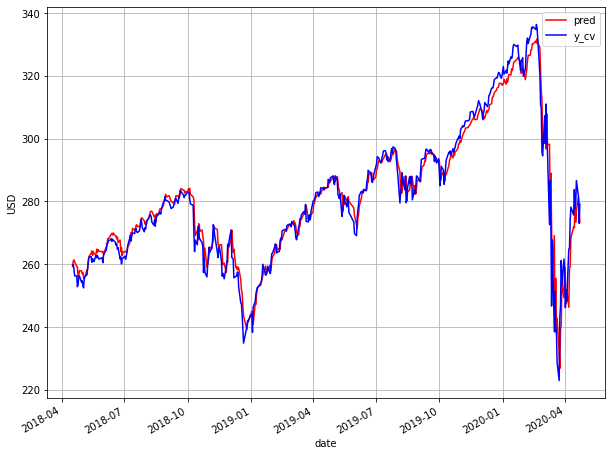

In [150]:
from pylab import rcParams
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

est_df = pd.DataFrame({'pred': pred_y.reshape(-1), 
                       'y_cv': y_cv.values.reshape(-1),
                       'date': df1.index})
ax = est_df.plot(x='date', y='pred', style='r-', grid=True)
ax = est_df.plot(x='date', y='y_cv', style='b', grid=True, ax=ax)
ax.set_xlabel("date")
ax.set_ylabel("USD")

Text(0, 0.5, 'USD')

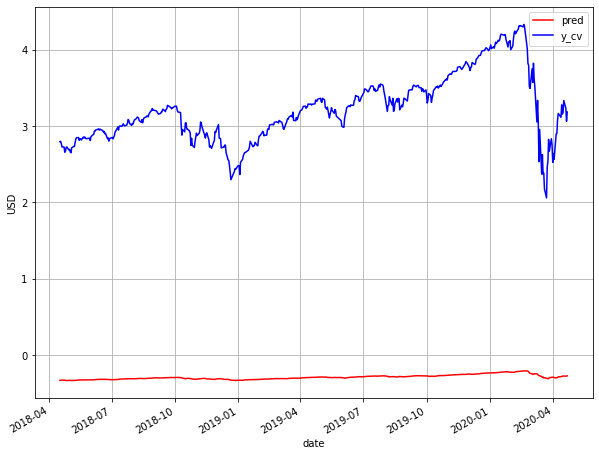

In [154]:
from pylab import rcParams
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

est_df = pd.DataFrame({'pred': pred.reshape(-1), 
                       'y_cv': y_val_single.reshape(-1),
                       'date': df1.index})
ax = est_df.plot(x='date', y='pred', style='r-', grid=True)
ax = est_df.plot(x='date', y='y_cv', style='b', grid=True, ax=ax)
ax.set_xlabel("date")
ax.set_ylabel("USD")

In [0]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [65]:
get_mape(pred_y,y_cv.values)

21.67570292928522